In [1]:
!pip install Cython
!pip install Ripser
import numpy as np
from ripser import ripser

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D


from sklearn.decomposition import PCA
from scipy.interpolate import InterpolatedUnivariateSpline

import ipywidgets as widgets
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

from IPython.display import clear_output

     |████████████████████████████████| 81kB 2.5MB/s 
  Created wheel for Ripser: filename=ripser-0.4.1-cp36-cp36m-linux_x86_64.whl size=423203 sha256=147f04fa5e10a95de32c81ae8e9b6cca82ba8fa74e8c8331aaf072a52395a8b3
  Stored in directory: /root/.cache/pip/wheels/d4/12/da/56d55c3af62ebd5e0684d521f3e58c1a85ac312502c9e2d47d
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18092 sha256=5e4c4e438c43d7defc593e2c830ad206017dfdd774a5df27aaf32b326fb7420c
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built Ripser hopcroftkarp


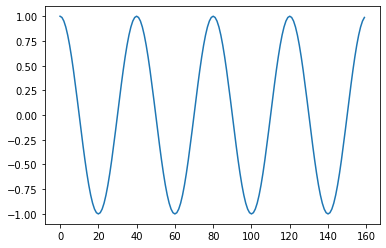

In [2]:
#pure sinusoid sliding window
# Step 1: Setup the signal
T = 40 # The period in number of samples
NPeriods = 4 # How many periods to go through
N = T*NPeriods #The total number of samples
t = np.linspace(0, 2*np.pi*NPeriods, N+1)[:N] # Sampling indices in time
x = np.cos(t) # The final signal
plt.plot(x);

In [0]:
#sliding window code

In [0]:
def getSlidingWindow(x, dim, Tau, dT):
    """
    Return a sliding window of a time series,
    using arbitrary sampling.  Use linear interpolation
    to fill in values in windows not on the original grid
    Parameters
    ----------
    x: ndarray(N)
        The original time series
    dim: int
        Dimension of sliding window (number of lags+1)
    Tau: float
        Length between lags, in units of time series
    dT: float
        Length between windows, in units of time series
    Returns
    -------
    X: ndarray(N, dim)
        All sliding windows stacked up
    """
    N = len(x)
    NWindows = int(np.floor((N-dim*Tau)/dT))
    if NWindows >= 0:
        print("Error: Tau too large for signal extent")
        return np.zeros((3,dim))
    X = np.zeros((NWindows,dim))
    spl = InterpolatedUnivariateSpline(np.arange(N),x)
    for i in range(NWindows):
        idxx = dT*i + Tau*np.arange(dim)
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))+2
        # Only take windows that are within range
        if end >= len(x):
            X = X[0:i, :]
            break
        X[i, :] = spl(idxx)
    return X

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


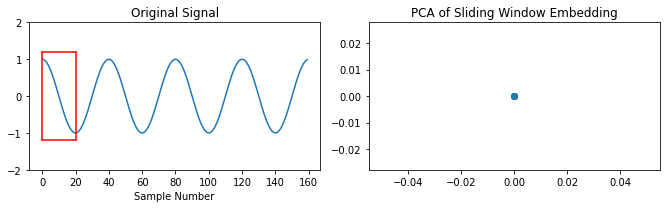

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


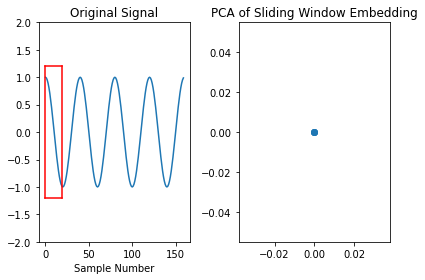

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


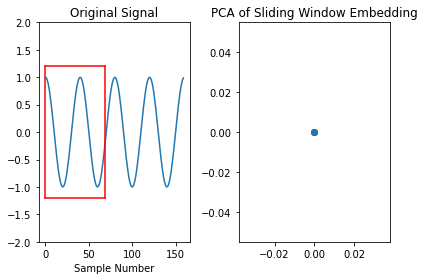

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


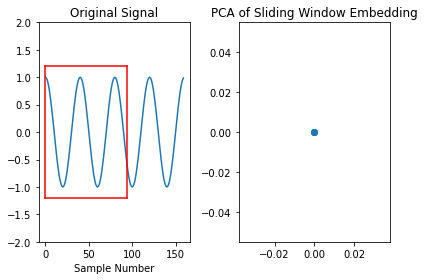

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


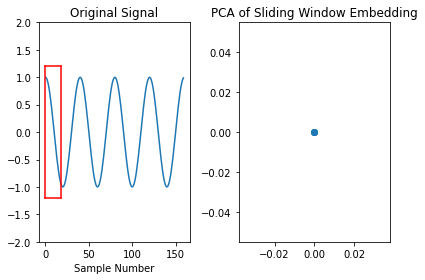

In [5]:
#sliding window result
def on_value_change(change):
    execute_computation1()
    
dimslider = widgets.IntSlider(min=1,max=40,value=20,description='Dimension:',continuous_update=False)
dimslider.observe(on_value_change, names='value')

Tauslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')

dTslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=0.5,description='dT: ',continuous_update=False)
dTslider.observe(on_value_change, names='value')

display(widgets.HBox(( dimslider,Tauslider,dTslider)))

plt.figure(figsize=(9.5, 3))
def execute_computation1():    
    plt.clf()
    # Step 1: Setup the signal again in case x was lost
    T = 40 # The period in number of samples
    NPeriods = 4 # How many periods to go through
    N = T*NPeriods # The total number of samples
    t = np.linspace(0, 2*np.pi*NPeriods, N+1)[0:N] # Sampling indices in time
    x = np.cos(t)  # The final signal
    
    # Get slider values
    dim = dimslider.value
    Tau = Tauslider.value
    dT = dTslider.value
    
    #Step 2: Do a sliding window embedding
    X = getSlidingWindow(x, dim, Tau, dT)
    extent = Tau*dim

    #Step 3: Perform PCA down to 2D for visualization
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(X)
    eigs = pca.explained_variance_
    print("lambda1 = %g, lambda2 = %g"%(eigs[0], eigs[1]))
        #Step 4: Plot original signal and PCA of the embedding
    ax = plt.subplot(121)
    ax.plot(x)
    ax.set_ylim((-2*max(x), 2*max(x)))
    ax.set_title("Original Signal")
    ax.set_xlabel("Sample Number")
    yr = np.max(x)-np.min(x)
    yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
    ax.plot([extent, extent], yr, 'r')
    ax.plot([0, 0], yr, 'r')     
    ax.plot([0, extent], [yr[0]]*2, 'r')
    ax.plot([0, extent], [yr[1]]*2, 'r')
    ax2 = plt.subplot(122)
    ax2.set_title("PCA of Sliding Window Embedding")
    ax2.scatter(Y[:, 0], Y[:, 1])
    ax2.set_aspect('equal', 'datalim')
    plt.tight_layout()
    
execute_computation1()

In [0]:
#non periodic signal sliding window

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


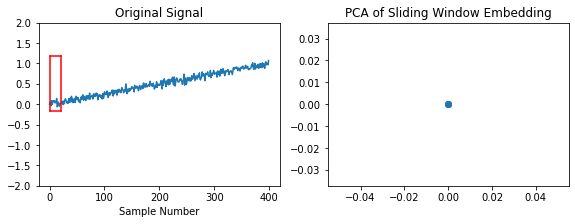

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


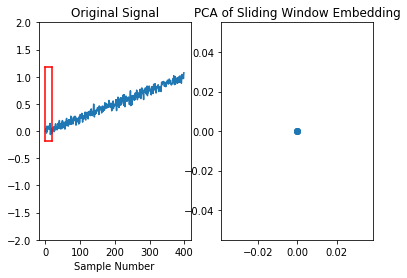

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


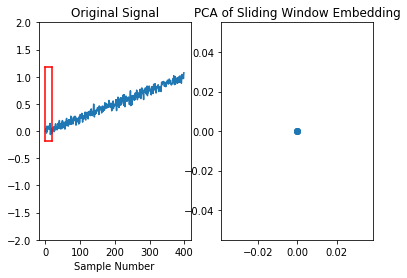

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


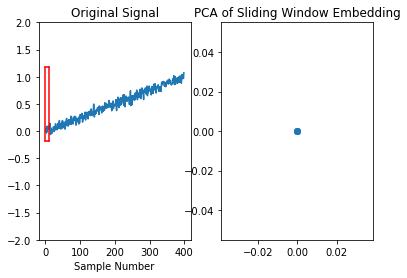

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


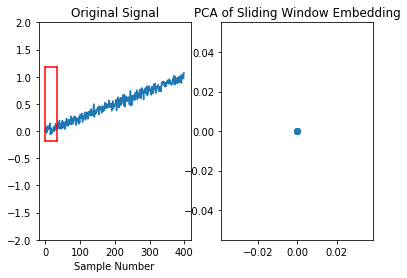

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


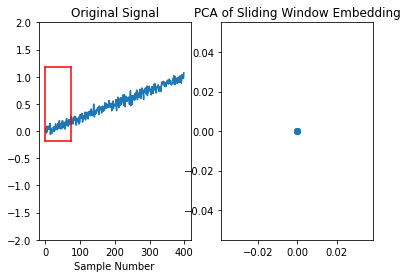

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


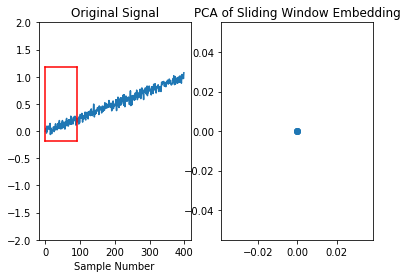

In [7]:
noise = 0.05*np.random.randn(400)

def on_value_change(change):
    execute_computation2()
    
dimslider = widgets.IntSlider(min=1,max=40,value=20,description='Dimension:',continuous_update=False)
dimslider.observe(on_value_change, names='value')

Tauslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=1,description='Tau: ',continuous_update=False)
Tauslider.observe(on_value_change, names='value')

dTslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=0.5,description='dT: ',continuous_update=False)
dTslider.observe(on_value_change, names='value')

display(widgets.HBox(( dimslider,Tauslider,dTslider)))

plt.figure(figsize=(9.5, 3))

def execute_computation2():    
    plt.clf()
    # Step 1: Set up the signal
    x = np.arange(400)
    x = x/float(len(x))
    x = x + noise # Add some noise
    
    # Get slider values
    dim = dimslider.value
    Tau = Tauslider.value
    dT = dTslider.value
    
    #Step 2: Do a sliding window embedding
    X = getSlidingWindow(x, dim, Tau, dT)
    extent = Tau*dim

    #Step 3: Perform PCA down to 2D for visualization
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(X)
    eigs = pca.explained_variance_
    print("lambda1 = %g, lambda2 = %g"%(eigs[0], eigs[1]))
        #Step 4: Plot original signal and PCA of the embedding
    gs = gridspec.GridSpec(1, 2)
    ax = plt.subplot(gs[0,0])
    ax.plot(x)
    ax.set_ylim((-2, 2))
    ax.set_title("Original Signal")
    ax.set_xlabel("Sample Number")
    yr = np.max(x)-np.min(x)
    yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
    ax.plot([extent, extent], yr, 'r')
    ax.plot([0, 0], yr, 'r')     
    ax.plot([0, extent], [yr[0]]*2, 'r')
    ax.plot([0, extent], [yr[1]]*2, 'r')       
    ax2 = plt.subplot(gs[0, 1])
    ax2.set_title("PCA of Sliding Window Embedding")
    ax2.scatter(Y[:, 0], Y[:, 1])
    ax2.set_aspect('equal', 'datalim')

execute_computation2()

In [0]:
#multiple sines sliding window

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


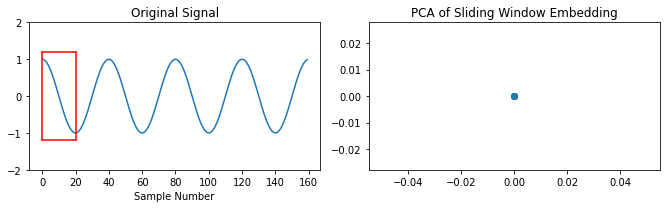

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


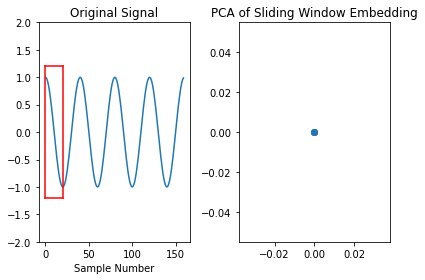

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


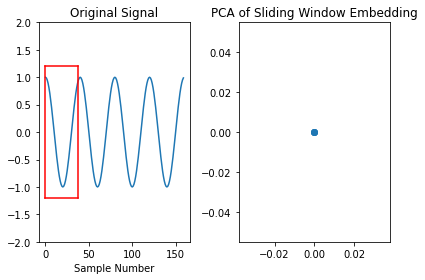

In [12]:
 def on_value_change(change):   
    execute_computation1()
    
dimslider = widgets.IntSlider(min=1,max=40,value=20,description='Dimension:',continuous_update=False)
dimslider.observe(on_value_change, names='value')

Tauslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')

dTslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=0.5,description='dT: ',continuous_update=False)
dTslider.observe(on_value_change, names='value')

display(widgets.HBox(( dimslider,Tauslider,dTslider)))

plt.figure(figsize=(9.5, 3))
def execute_computation1():    
    plt.clf()
    # Step 1: Setup the signal again in case x was lost
    T = 40 # The period in number of samples
    NPeriods = 4 # How many periods to go through
    N = T*NPeriods # The total number of samples
    t = np.linspace(0, 2*np.pi*NPeriods, N+1)[0:N] # Sampling indices in time
    x = np.cos(t)  # The final signal
    
    # Get slider values
    dim = dimslider.value
    Tau = Tauslider.value
    dT = dTslider.value
    
    #Step 2: Do a sliding window embedding
    X = getSlidingWindow(x, dim, Tau, dT)
    extent = Tau*dim
    

    #Step 3: Perform PCA down to 2D for visualization
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(X)
    eigs = pca.explained_variance_
    print("lambda1 = %g, lambda2 = %g"%(eigs[0], eigs[1]))

    #Step 4: Plot original signal and PCA of the embedding
    ax = plt.subplot(121)
    ax.plot(x)
    ax.set_ylim((-2*max(x), 2*max(x)))
    ax.set_title("Original Signal")
    ax.set_xlabel("Sample Number")
    yr = np.max(x)-np.min(x)
    yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
    ax.plot([extent, extent], yr, 'r')
    ax.plot([0, 0], yr, 'r')     
    ax.plot([0, extent], [yr[0]]*2, 'r')
    ax.plot([0, extent], [yr[1]]*2, 'r')
    ax2 = plt.subplot(122)
    ax2.set_title("PCA of Sliding Window Embedding")
    ax2.scatter(Y[:, 0], Y[:, 1])
    ax2.set_aspect('equal', 'datalim')
    plt.tight_layout()
    
execute_computation1()


In [0]:
#non periodic signal sliding window

Error: Tau too large for signal extent
lambda1 = 0, lambda2 = 0


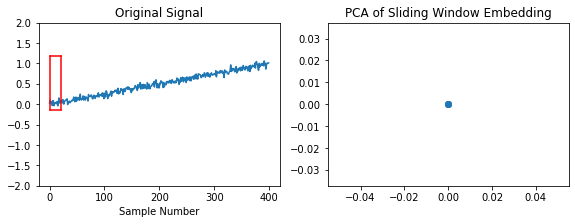

In [14]:

noise = 0.05*np.random.randn(400)

def on_value_change(change):
    execute_computation2()
    
dimslider = widgets.IntSlider(min=1,max=40,value=20,description='Dimension:',continuous_update=False)
dimslider.observe(on_value_change, names='value')

Tauslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=1,description='Tau: ',continuous_update=False)
Tauslider.observe(on_value_change, names='value')

dTslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=0.5,description='dT: ',continuous_update=False)
dTslider.observe(on_value_change, names='value')

display(widgets.HBox(( dimslider,Tauslider,dTslider)))

plt.figure(figsize=(9.5, 3))

def execute_computation2():    
    plt.clf()
    # Step 1: Set up the signal
    x = np.arange(400)
    x = x/float(len(x))
    x = x + noise # Add some noise
    
    # Get slider values
    dim = dimslider.value
    Tau = Tauslider.value
    dT = dTslider.value
    
    #Step 2: Do a sliding window embedding
    X = getSlidingWindow(x, dim, Tau, dT)
    extent = Tau*dim

    #Step 3: Perform PCA down to 2D for visualization
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(X)
    eigs = pca.explained_variance_
    print("lambda1 = %g, lambda2 = %g"%(eigs[0], eigs[1]))
    

    #Step 4: Plot original signal and PCA of the embedding
    gs = gridspec.GridSpec(1, 2)
    ax = plt.subplot(gs[0,0])
    ax.plot(x)
    ax.set_ylim((-2, 2))
    ax.set_title("Original Signal")
    ax.set_xlabel("Sample Number")
    yr = np.max(x)-np.min(x)
    yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
    ax.plot([extent, extent], yr, 'r')
    ax.plot([0, 0], yr, 'r')     
    ax.plot([0, extent], [yr[0]]*2, 'r')
    ax.plot([0, extent], [yr[1]]*2, 'r')       
    ax2 = plt.subplot(gs[0, 1])
    ax2.set_title("PCA of Sliding Window Embedding")
    ax2.scatter(Y[:, 0], Y[:, 1])
    ax2.set_aspect('equal', 'datalim')

execute_computation2()

In [0]:
#multiple sines sliding window

In [17]:
def on_value_change(change):   
    execute_computation3()

embeddingdimbox = widgets.Dropdown(options=[2, 3],value=3,description='Embedding Dimension:',disabled=False)
embeddingdimbox.observe(on_value_change,names='value')

secondfreq = widgets.Dropdown(options=[2, 3, np.pi],value=3,description='Second Frequency:',disabled=False)
secondfreq.observe(on_value_change,names='value')

noiseampslider = widgets.FloatSlider(min=0,max=6,step=0.5,value=0,description='Noise Amplitude',continuous_update=False)
noiseampslider.observe(on_value_change, names='value')

dimslider = widgets.IntSlider(min=1,max=100,value=30,description='Dimension:',continuous_update=False)
dimslider.observe(on_value_change, names='value')

Tauslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=1,description='Tau: ',continuous_update=False)
Tauslider.observe(on_value_change, names='value')

dTslider = widgets.FloatSlider(min=0.1,max=5,step=0.1,value=0.5,description='dT: ',continuous_update=False)
dTslider.observe(on_value_change, names='value')

display(widgets.HBox(( secondfreq,embeddingdimbox,noiseampslider)))
display(widgets.HBox((dimslider,Tauslider,dTslider)))

noise = np.random.randn(10000)


fig = plt.figure(figsize=(9.5, 4))
def execute_computation3():
    plt.clf()
    
    # Step 1: Setup the signal
    T1 = 20 # The period of the first sine in number of samples
    T2 = T1*secondfreq.value # The period of the second sine in number of samples
    NPeriods = 10 # How many periods to go through, relative to the second sinusoid
    N = T2*NPeriods # The total number of samples
    t = np.arange(N) # Time indices
    x = np.cos(2*np.pi*(1.0/T1)*t) # The first sinusoid
    x += np.cos(2*np.pi*(1.0/T2)*t) # Add the second sinusoid
    x += noiseampslider.value*noise[:len(x)]
    
    # Get widget values
    dim = dimslider.value
    Tau = Tauslider.value
    dT = dTslider.value
    embeddingdim = embeddingdimbox.value
    
    # Step 2: Do a sliding window embedding
    X = getSlidingWindow(x, dim, Tau, dT)
    extent = Tau*dim

    # Step 3: Perform PCA down to dimension chosen for visualization
    pca = PCA(n_components = 10)
    Y = pca.fit_transform(X)
    eigs = pca.explained_variance_

    # Step 4: Plot original signal and PCA of the embedding 
    gs = gridspec.GridSpec(2, 2,width_ratios=[1, 2])
    
    # Plot the signal
    ax = plt.subplot(gs[0,0])
    ax.plot(x)
    yr = np.max(x)-np.min(x)
    yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
    ax.plot([extent, extent], yr, 'r')
    ax.plot([0, 0], yr, 'r')     
    ax.plot([0, extent], [yr[0]]*2, 'r')
    ax.plot([0, extent], [yr[1]]*2, 'r')
    ax.set_title("Original Signal")
    ax.set_xlabel("Sample Number")

    c = plt.get_cmap('jet')
    C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
    C = C[:, 0:3]
    

    # Plot the PCA embedding
    if embeddingdim == 3:
        ax2 = plt.subplot(gs[:,1],projection='3d')
        ax2.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=C)
        ax2.set_aspect('equal', 'datalim')
    else:
        ax2 = plt.subplot(gs[:,1])
        ax2.scatter(Y[:, 0], Y[:, 1],c=C)

    ax2.set_title("PCA of Sliding Window Embedding")
    ax2.set_aspect('equal', 'datalim')

    # Plot the eigenvalues as bars
    ax3 = plt.subplot(gs[1,0])
    eigs = eigs[0:min(len(eigs), 10)]
    ax3.bar(np.arange(len(eigs)), eigs)
    ax3.set_xlabel("Eigenvalue Number")
    ax3.set_ylabel("Eigenvalue")
    ax3.set_title("PCA Eigenvalues")

    plt.tight_layout()

    plt.show();

execute_computation3()



Error: Tau too large for signal extent


ValueError: ignored

<Figure size 684x288 with 0 Axes>

Error: Tau too large for signal extent


ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
#power spectrum

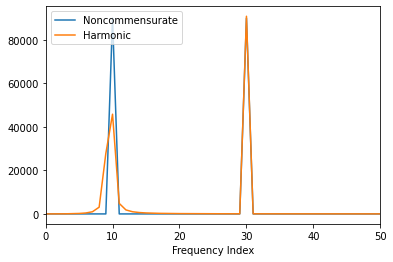

In [19]:
T = 20 #The period of the first sine in number of samples
NPeriods = 10 #How many periods to go through, relative to the faster sinusoid
N = T*NPeriods*3 #The total number of samples
t = np.arange(N) #Time indices

#Make the harmonic signal cos(t) + cos(3t)
xH = np.cos(2*np.pi*(1.0/T)*t) + np.cos(2*np.pi*(1.0/(3*T)*t))
                                        
#Make the incommensurate signal cos(t) + cos(pi*t)
xNC = np.cos(2*np.pi*(1.0/T)*t) + np.cos(2*np.pi*(1.0/(np.pi*T)*t))

plt.figure()
P1 = np.abs(np.fft.fft(xH))**2
P2 = np.abs(np.fft.fft(xNC))**2
plt.plot(np.arange(len(P1)), P1)
plt.plot(np.arange(len(P2)), P2)
plt.xlabel("Frequency Index")
plt.legend({"Harmonic", "Noncommensurate"})
plt.xlim([0, 50])
plt.show();